In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# 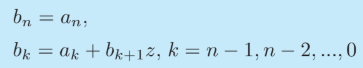

In [3]:
def horner(p, x): #p armazena os coeficientes do polinômio, x é o valor que queremos avaliar -> p(x)
    n = p.flatten().shape[0] #Grau do polinômio -> quantidade de coeficientes
    b = np.zeros(n) #b irá armazenar o polinômio associado e a solução de p(x)
    
    b[0] = p[0]
    
    for i in range(1, n):
        b[i] = p[i] + b[i-1] * x
        
    px = b[-1]
    qx = b[:-1]
    return px, qx

##  1. Implemente o método de Newton para polinômios newtonPol(). Ele deve receber como entrada o vetor com os coeficientes do polinômio p, um chute inicial x^(0), uma tolerância máxima para o erro tol e um número máximo de iterações maxIt. Ele deve usar o algoritmo de Horner para calcular o valor de p(x^(k)) e p'(x^(k)) (através do polinômio associado).

# 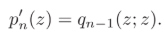

In [3]:
def newtonPol(coeff, x0, tol = 1e-3, maxIt = 50):
    for it in range(maxIt):
        fx, qx = horner(coeff, x0) #utilizando o método de Horner para calcular o valor de f(x0) (é utilizado o vetor de coeficientes de f e o ponto x0)
        if(np.abs(fx) <= tol):
            return x0, it

        df, qx = horner(qx, x0) #utilizando o método de Horner para calcular a derivada df(x0) (é utilizado o  vetor de coeficientes do polinômio associado e o ponto x0)
            
        if(df == 0):
            print("A derivada zerou")
            return x, it
        
        x0 = x0 - fx/df
    
    print("O método não atingiu a tolerância!")
    return x0, maxIt

In [4]:
#Testando a implementação
#x³ + 0x² + 2x + 1  ->  3x² + 0x + 2
x, it = newtonPol(np.array([1, 0, 2, 1]), -1)
print('> ', x, it)

>  -0.453467173827973 3


## 2. Implemente o método Newton-Horner para encontrar todos os zeros de um polinômio.Ele deve receber como entrada o vetor com os coeficientes do polinômio p, um chute inicial x^(0), uma tolerância máxima para o erro tol e um número máximo de iterações maxIt. Seu código deve utilizar o método do exercício anterior para calcular cada raiz e obter o próximo polinômio de grau cada vez menor.

In [5]:
def newtonHorner(coeff, x0, tol = 1e-3, maxIt = 50):
    n = len(coeff) - 1
    raizes = np.zeros(n)  #vetor para armazenar as raizes
    iteracoes = np.zeros(n) #vetor para armazenar as iteracoes necessárias para encontrar cada raiz
    
    for k in range(n): #iterando sobre cada raiz
        nIter = 0
        x = x0
        
        x, nIter = newtonPol(coeff, x0, tol, maxIt) #Utilizando o método do exercício anterior para calcular cada raiz
        px, coeff = horner(coeff, x) #obtendo o próximo polinômio de grau cada vez menor
        
        raizes[k] = x #armazenando a raiz no vetor de raizes
        iteracoes[k] = nIter #armazenando a quantidade de iterações no vetor de iterações

    return raizes, iteracoes

## 3. Utilize o método de Newton-Horner para encontrar as raízes de:

### (a) f(x) = x^4 − 10x³ + 35x² − 50x + 24

In [6]:
rf, itf = newtonHorner(np.array([1, -10, 35, -50, 24]), 0)
print('Raizes: ', rf)
print('Iterações: ', itf)

Raizes:  [0.99996008 2.00011657 2.99978631 4.00013704]
Iterações:  [5. 6. 5. 1.]


### (b) g(x) = x^10 − 17x^9 − 19x^8 + 1981x^7 − 11758x^6 − 14564x^5 + 362056x^4 − 1249920x³ + 1411200x²

In [7]:
rg, itg = newtonHorner(np.array([1, -17, -19, 1981, -11758, -14564, 362056, -1249920, 1411200, 0, 0]), -11)
print('Raizes: ', rg)
print('Iterações: ', itg)

Raizes:  [-1.00000000e+01 -6.00000000e+00 -1.19867671e-04  1.19884027e-04
  3.99559654e+00  4.00442561e+00  5.00000113e+00  5.99989165e+00
  6.98359849e+00  7.01648656e+00]
Iterações:  [ 6. 10. 24. 13. 21. 14. 13. 11. 10.  1.]


### (c) h(x) = x^4 − πx³ − x² + πx

In [8]:
rh, ith = newtonHorner(np.array([1, -np.pi, -1, np.pi, 0]), -2)
print('Raizes: ', rh)
print('Iterações: ', ith)

Raizes:  [-1.00001932e+00  5.07276115e-05  9.99576494e-01  3.14198476e+00]
Iterações:  [5. 6. 4. 1.]
